In [1]:
import matplotlib.pyplot as plt
from skimage import *
import numpy as np
from skimage.viewer import ImageViewer
from tifffile import * 
import matplotlib.patches as mpatches 
from skimage import io

In [2]:
green =io.imread('test_images_tiff/B3.tif')
nir = io.imread('test_images_tiff/B5.tif')

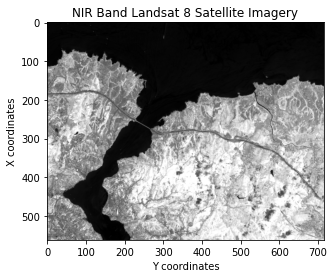

In [3]:
#nir
plt.title("NIR Band Landsat 8 Satellite Imagery")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(nir)

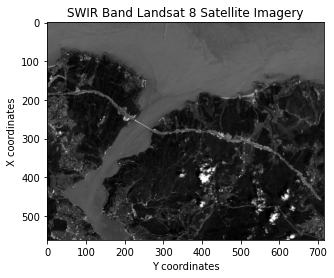

In [4]:
#swir
plt.title("SWIR Band Landsat 8 Satellite Imagery")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(green)

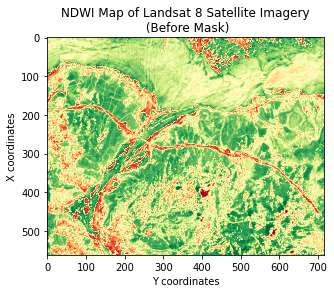

In [5]:
#import create_ndvi function in order to calculate ndvi
from utils import create_ndwi

ndwi=create_ndwi(green_band=green,nir_band=nir)
ndwi_in_uint = (ndwi*255).astype('uint8')
ndwi_before_mask=ndwi_in_uint[:,:,1]
plt.title("NDWI Map of Landsat 8 Satellite Imagery\n (Before Mask)")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(ndwi_before_mask,cmap='RdYlGn',vmin=0,vmax=255)

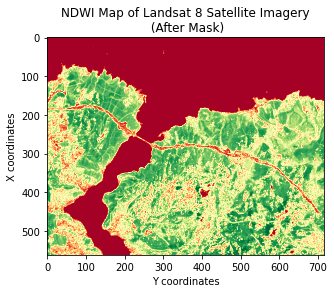

In [6]:
#import mask function in order to mask water bodies
from utils import water_mask_ndwi_for_landsat_8

img = water_mask_ndwi_for_landsat_8(ndwi_band=ndwi,nir_band=nir)
plt.title("NDWI Map of Landsat 8 Satellite Imagery\n (After Mask)")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(img,cmap='RdYlGn',vmin=0,vmax=255)
plt.savefig('outputs/NDWI_Landsat_8.png',format="png")
plt.show()